# Image classification using Data Augumentation method using Image Datagenerator
Checked the accuracy of 13 Pretrained models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r"C:\Users\HP\Downloads\imgdataset\Multi-class Weather Dataset"))

['train', 'validation']


In [2]:
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import load_model,model_from_json
from keras.applications.vgg16 import preprocess_input

In [3]:
import tensorflow as tf
import PIL

In [4]:
path = r"C:\Users\HP\Downloads\imgdataset\Multi-class Weather Dataset"

train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True,shear_range = 10,zoom_range = 0.2,preprocessing_function =preprocess_input )
train_generator = train_datagen.flow_from_directory(path+"/train",target_size = (224,224),shuffle = True,class_mode = 'categorical')

validation_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function = preprocess_input)
validation_generator = validation_datagen.flow_from_directory(path + "/validation",target_size = (224,224),shuffle = False,class_mode = 'categorical')

Found 2066 images belonging to 10 classes.
Found 2067 images belonging to 10 classes.


# VGG16

In [5]:
conv_base = VGG16(include_top = False,weights = 'imagenet')

In [6]:
for layer in conv_base.layers:
    layer.trainable = False
X = conv_base.output
X = keras.layers.GlobalAveragePooling2D()(X)
X = keras.layers.Dense(128,activation = 'relu')(X)
output_1 = keras.layers.Dense(10,activation = 'softmax')(X)
model = keras.Model(inputs = conv_base.input,outputs = output_1)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [8]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [9]:
history = model.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
45/45 [==============================] - 373s 8s/step - loss: 1.7680 - accuracy: 0.4618 - val_loss: 1.2151 - val_accuracy: 0.8188
Epoch 2/5
45/45 [==============================] - 380s 8s/step - loss: 1.2094 - accuracy: 0.7076 - val_loss: 0.9789 - val_accuracy: 0.7500
Epoch 3/5
45/45 [==============================] - 366s 8s/step - loss: 0.9226 - accuracy: 0.7604 - val_loss: 0.7254 - val_accuracy: 0.8094
Epoch 4/5
45/45 [==============================] - 371s 8s/step - loss: 0.7894 - accuracy: 0.7632 - val_loss: 0.6057 - val_accuracy: 0.8531
Epoch 5/5
45/45 [==============================] - 364s 8s/step - loss: 0.6621 - accuracy: 0.7973 - val_loss: 0.5550 - val_accuracy: 0.8562


Text(0.5, 1.0, 'Accuracy')

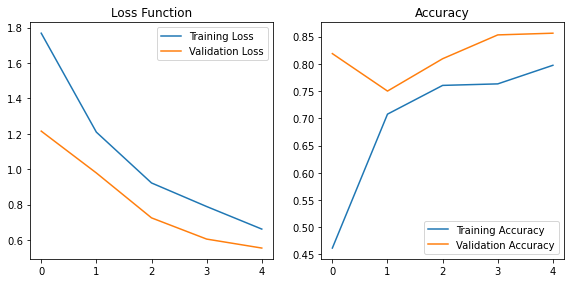

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

plt.subplot(4,4, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function')

plt.subplot(4, 4, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

In [11]:
model.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
65/65 [==============================] - 445s 7s/step - loss: 0.6304 - accuracy: 0.8170


[0.630423367023468, 0.8170377612113953]

In [12]:
score = model.evaluate_generator(validation_generator)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5920190215110779
Test Accuracy: 0.8180938363075256


In [13]:
batch_size = 10
Y_pred1 = model.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred1 = np.argmax(Y_pred1, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm1 = confusion_matrix(validation_generator.classes, y_pred1)
print(cm1)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred1))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[254   1   2  18   1  12  12   0   0   0]
 [  0 280   1   0   2   0   3   0   0   0]
 [  5   0 198   0   1   0  11   0   0   0]
 [ 48   0   1 129   1  61  12   0   1   0]
 [  0   6   1   2 256   0   3   0   0   0]
 [  8   2   3  11   1 318  14   0   0   0]
 [ 16  17  13   1   4   5 244   0   0   0]
 [  0   1   0   1   0   0   1   0   0   0]
 [  8   0  10  10   4   0   0   0  12   0]
 [ 15   0   6   7   1   1  11   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       300
           1       0.91      0.98      0.94       286
           2       0.84      0.92      0.88       215
           3       0.72      0.51      0.60       253
           4       0.94      0.96      0.95       268
           5       0.80      0.89      0.84       357
           6       0.78      0.81      0.80       300
           7     

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model.to_json()
with open('vgg16_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model.save_weights('model_vgg16.hdf5', overwrite=True)

# Resnet50

In [15]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from keras.optimizers import *

In [16]:
conv_base1 = ResNet50(
    include_top=True,
    weights='imagenet')

for layer in conv_base1.layers:
    layer.trainable = True

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout

x1 = conv_base1.output

x1 = Flatten()(x1)
x1 = Dense(units=512, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(units=512, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
output1  = Dense(units=10, activation='softmax')(x1)
model1 = Model(conv_base1.input, output1)


model1.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [18]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



 
import datetime
now = datetime.datetime.now
t1 = now()
transfer_learning_history1 = model1.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)
print('Training time: %s' % (now() - t1))

Epoch 1/5
45/45 [==============================] - 876s 19s/step - loss: 1.7457 - accuracy: 0.4544 - val_loss: 3.3994 - val_accuracy: 0.0625
Epoch 2/5
45/45 [==============================] - 1007s 22s/step - loss: 1.3905 - accuracy: 0.5182 - val_loss: 2.6724 - val_accuracy: 0.0000e+00
Epoch 3/5
45/45 [==============================] - 1049s 23s/step - loss: 1.2724 - accuracy: 0.5771 - val_loss: 1.2056 - val_accuracy: 0.9156
Epoch 4/5
45/45 [==============================] - 996s 22s/step - loss: 1.1435 - accuracy: 0.6248 - val_loss: 1.5221 - val_accuracy: 0.0000e+00
Epoch 5/5
45/45 [==============================] - 956s 21s/step - loss: 1.0169 - accuracy: 0.6704 - val_loss: 1.2152 - val_accuracy: 0.9375
Training time: 1:23:50.695279


In [20]:
# evaluate the performance the new model and report the results
score1 = model1.evaluate_generator(validation_generator)
print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])


Test Score: 3.0914502143859863
Test Accuracy: 0.14513787627220154


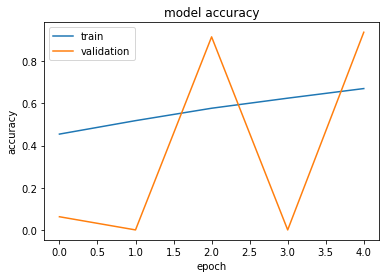

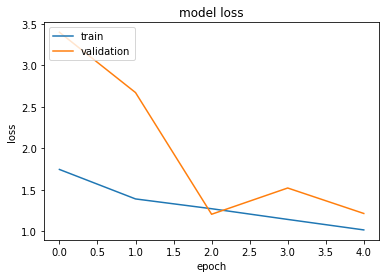

In [21]:
import matplotlib.pyplot as plt
plt.plot(transfer_learning_history1.history['accuracy'])
plt.plot(transfer_learning_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(transfer_learning_history1.history['loss'])
plt.plot(transfer_learning_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
batch_size = 10
Y_pred2 = model1.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred2 = np.argmax(Y_pred2, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm2 = confusion_matrix(validation_generator.classes, y_pred2)
print(cm2)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred2))

Confusion Matrix
[[300   0   0   0   0   0   0   0   0   0]
 [286   0   0   0   0   0   0   0   0   0]
 [215   0   0   0   0   0   0   0   0   0]
 [253   0   0   0   0   0   0   0   0   0]
 [268   0   0   0   0   0   0   0   0   0]
 [357   0   0   0   0   0   0   0   0   0]
 [300   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [ 44   0   0   0   0   0   0   0   0   0]
 [ 41   0   0   0   0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.15      1.00      0.25       300
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       215
           3       0.00      0.00      0.00       253
           4       0.00      0.00      0.00       268
           5       0.00      0.00      0.00       357
           6       0.00      0.00      0.00       300
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00

In [23]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model1.to_json()
with open('resnet50_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model1.save_weights('model_resnet50.hdf5', overwrite=True)

# Resnet152V2

In [24]:
import os
import tensorflow as tf #tf 2.0.0
import numpy as np

In [25]:
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [26]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x2 = ResNet_model.output
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)
x2 = Dense(units=512, activation='relu')(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(units=512, activation='relu')(x2)
x2 = Dropout(0.3)(x2)
output2  = Dense(units=10, activation='softmax')(x2)
model2 = Model(ResNet_model.input, output2)


model2.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [27]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



 
import datetime
now = datetime.datetime.now
t2 = now()
transfer_learning_history = model2.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)
print('Training time: %s' % (now() - t2))

Epoch 1/5
45/45 [==============================] - 397s 9s/step - loss: 0.6937 - accuracy: 0.7958 - val_loss: 4.0752 - val_accuracy: 0.4875
Epoch 2/5
45/45 [==============================] - 397s 9s/step - loss: 0.2514 - accuracy: 0.9340 - val_loss: 3.1589 - val_accuracy: 0.7188
Epoch 3/5
45/45 [==============================] - 397s 9s/step - loss: 0.2570 - accuracy: 0.9278 - val_loss: 0.2630 - val_accuracy: 0.9594
Epoch 4/5
45/45 [==============================] - 395s 9s/step - loss: 0.1788 - accuracy: 0.9523 - val_loss: 0.0458 - val_accuracy: 0.9812
Epoch 5/5
45/45 [==============================] - 403s 9s/step - loss: 0.1614 - accuracy: 0.9590 - val_loss: 0.1344 - val_accuracy: 0.9563
Training time: 0:34:09.042988


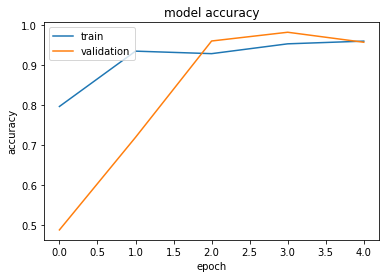

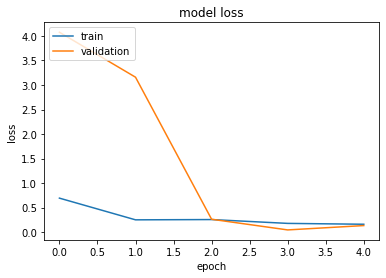

In [29]:
plt.plot(transfer_learning_history.history['accuracy'])
plt.plot(transfer_learning_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(transfer_learning_history.history['loss'])
plt.plot(transfer_learning_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
model2.evaluate(validation_generator)

65/65 [==============================] - 419s 6s/step - loss: 0.1001 - accuracy: 0.9792


[0.10006234794855118, 0.9791969060897827]

In [31]:
pred2=model2.predict(validation_generator)
predicted_class_indices=np.argmax(pred2,axis=1)
print("Pred",pred2)

Pred [[1.0000000e+00 1.3428579e-22 8.9544523e-21 ... 1.0880614e-20
  8.2728672e-20 7.9397952e-16]
 [9.9999893e-01 2.1758274e-12 2.4973896e-11 ... 4.9365435e-11
  4.0705014e-10 2.3341389e-09]
 [5.3154624e-01 9.4986224e-04 3.4756809e-03 ... 4.0443358e-03
  2.7084945e-02 1.6634138e-03]
 ...
 [1.2245365e-26 1.1987483e-38 0.0000000e+00 ... 5.4919836e-29
  1.8292140e-36 1.0000000e+00]
 [7.0251347e-28 0.0000000e+00 0.0000000e+00 ... 2.9282185e-30
  5.1822192e-37 1.0000000e+00]
 [2.3225444e-29 0.0000000e+00 0.0000000e+00 ... 1.7404253e-32
  0.0000000e+00 1.0000000e+00]]


In [32]:
print("pci:",predicted_class_indices)

pci: [0 0 0 ... 9 9 9]


In [33]:
batch_size = 10
Y_pred3 = model2.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred3 = np.argmax(Y_pred3, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm3 = confusion_matrix(validation_generator.classes, y_pred3)
print(cm3)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred3))

Confusion Matrix
[[287   0   0  12   0   0   1   0   0   0]
 [  0 283   0   0   0   0   3   0   0   0]
 [  0   1 209   1   0   0   4   0   0   0]
 [  3   0   0 249   0   0   1   0   0   0]
 [  0   0   1   2 265   0   0   0   0   0]
 [  0   0   0   4   0 353   0   0   0   0]
 [  0   1   0   0   0   6 293   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   1   0   0   0   0  43   0]
 [  0   0   0   1   0   0   1   0   0  39]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       300
           1       0.99      0.99      0.99       286
           2       1.00      0.97      0.98       215
           3       0.92      0.98      0.95       253
           4       1.00      0.99      0.99       268
           5       0.98      0.99      0.99       357
           6       0.97      0.98      0.97       300
           7       1.00      1.00      1.00         3
           8       1.00      0.98      0.99

In [34]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model2.to_json()
with open('resnet152_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model2.save_weights('model_resnet152.hdf5', overwrite=True)

# VGG19 

In [35]:
from keras.applications import VGG19
from keras.models import load_model,model_from_json
from keras.applications.vgg19 import preprocess_input

In [36]:
conv_base3 = VGG19(include_top = False,weights = 'imagenet')

In [37]:
for layer in conv_base3.layers:
    layer.trainable = False  
    
X3 = conv_base3.output
X3 = keras.layers.GlobalAveragePooling2D()(X3)
X3 = keras.layers.Dense(128,activation = 'relu')(X3)
output_3 = keras.layers.Dense(10,activation = 'softmax')(X3)
model3 = keras.Model(inputs = conv_base3.input,outputs = output_3)

In [38]:
model3.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [39]:
model3.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [40]:
history3 = model3.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 470s 10s/step - loss: 1.7975 - accuracy: 0.4326 - val_loss: 1.4656 - val_accuracy: 0.6562
Epoch 2/5
45/45 [==============================] - 460s 10s/step - loss: 1.3091 - accuracy: 0.6438 - val_loss: 1.1644 - val_accuracy: 0.7094
Epoch 3/5
45/45 [==============================] - 460s 10s/step - loss: 1.0469 - accuracy: 0.7264 - val_loss: 0.8325 - val_accuracy: 0.8281
Epoch 4/5
45/45 [==============================] - 453s 10s/step - loss: 0.8727 - accuracy: 0.7602 - val_loss: 0.7012 - val_accuracy: 0.8219
Epoch 5/5
45/45 [==============================] - 454s 10s/step - loss: 0.7671 - accuracy: 0.7910 - val_loss: 0.7689 - val_accuracy: 0.7656


Text(0.5, 1.0, 'Accuracy')

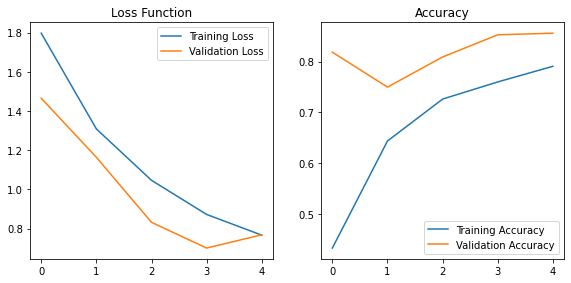

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function')

plt.subplot(4, 4, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

In [42]:
model3.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 556s 9s/step - loss: 0.7225 - accuracy: 0.8093


[0.7224528789520264, 0.8092933297157288]

In [43]:
score3 = model3.evaluate_generator(validation_generator)
print("Test Score:", score3[0])
print("Test Accuracy:", score3[1])

Test Score: 0.6901954412460327
Test Accuracy: 0.8069666028022766


In [44]:
batch_size = 10
Y_pred4 = model3.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred4 = np.argmax(Y_pred4, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm4 = confusion_matrix(validation_generator.classes, y_pred4)
print(cm4)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred4))

Confusion Matrix
[[225   0   5  41   1   3  25   0   0   0]
 [  0 281   0   0   1   1   3   0   0   0]
 [ 31   2 166   4   2   1   9   0   0   0]
 [ 27   0   1 189   1  25  10   0   0   0]
 [  0   6   1   1 259   0   1   0   0   0]
 [  1   0   2  11   0 333  10   0   0   0]
 [ 15  22  29   3  10   7 214   0   0   0]
 [  0   1   0   2   0   0   0   0   0   0]
 [  1   0  17  16   9   0   0   0   1   0]
 [ 15   0   7   6   2   2   9   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       300
           1       0.90      0.98      0.94       286
           2       0.73      0.77      0.75       215
           3       0.69      0.75      0.72       253
           4       0.91      0.97      0.94       268
           5       0.90      0.93      0.91       357
           6       0.76      0.71      0.74       300
           7       0.00      0.00      0.00         3
           8       1.00      0.02      0.04

In [45]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model3.to_json()
with open('vgg19_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model3.save_weights('model_vgg19.hdf5', overwrite=True)

# Inception V3

In [46]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3  import preprocess_input

In [47]:
conv_base4 = InceptionV3(include_top = False,weights = 'imagenet')

In [48]:
for layer in conv_base4.layers:
    layer.trainable = False
    
X4 = conv_base4.output
X4 = keras.layers.GlobalAveragePooling2D()(X4)
X4 = keras.layers.Dense(128,activation = 'relu')(X4)
output_4 = keras.layers.Dense(10,activation = 'softmax')(X4)
model4 = keras.Model(inputs = conv_base4.input,outputs = output_4)

In [49]:
model4.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [50]:
model4.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [51]:
history4 = model4.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 114s 3s/step - loss: 1.0249 - accuracy: 0.6767 - val_loss: 0.4112 - val_accuracy: 0.8719
Epoch 2/5
45/45 [==============================] - 109s 2s/step - loss: 0.4636 - accuracy: 0.8485 - val_loss: 0.3180 - val_accuracy: 0.9031
Epoch 3/5
45/45 [==============================] - 112s 2s/step - loss: 0.2874 - accuracy: 0.9081 - val_loss: 0.3178 - val_accuracy: 0.9031
Epoch 4/5
45/45 [==============================] - 120s 3s/step - loss: 0.2491 - accuracy: 0.9215 - val_loss: 0.0942 - val_accuracy: 0.9719
Epoch 5/5
45/45 [==============================] - 118s 3s/step - loss: 0.2279 - accuracy: 0.9264 - val_loss: 0.1280 - val_accuracy: 0.9719


Text(0.5, 1.0, 'Accuracy')

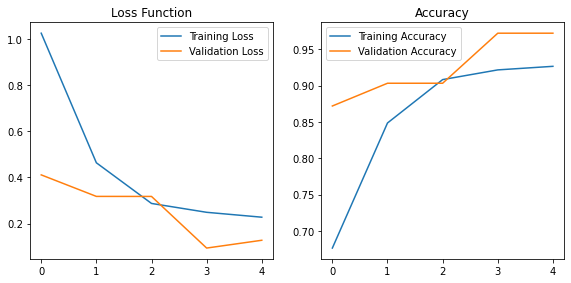

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function')

plt.subplot(4, 4, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

In [53]:
model4.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 135s 2s/step - loss: 0.1947 - accuracy: 0.9385


[0.1947028487920761, 0.9385285377502441]

In [54]:
score4 = model4.evaluate_generator(validation_generator)
print("Test Score:", score4[0])
print("Test Accuracy:", score4[1])

Test Score: 0.1976848542690277
Test Accuracy: 0.9371069073677063


In [55]:
batch_size = 10
Y_pred5 = model4.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred5 = np.argmax(Y_pred5, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm5 = confusion_matrix(validation_generator.classes, y_pred5)
print(cm5)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred5))

Confusion Matrix
[[291   0   0   5   0   2   2   0   0   0]
 [  0 286   0   0   0   0   0   0   0   0]
 [  4   0 192   1   1   5  11   0   1   0]
 [ 13   0   0 232   0   5   1   0   2   0]
 [  0  21   0   0 243   2   2   0   0   0]
 [  8   0   0   1   0 334  14   0   0   0]
 [  3   7   1   0   0   2 287   0   0   0]
 [  0   0   0   0   0   1   0   2   0   0]
 [  2   0   2   2   1   0   3   0  34   0]
 [  5   0   0   0   0   0   0   0   0  36]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       300
           1       0.91      1.00      0.95       286
           2       0.98      0.89      0.94       215
           3       0.96      0.92      0.94       253
           4       0.99      0.91      0.95       268
           5       0.95      0.94      0.94       357
           6       0.90      0.96      0.93       300
           7       1.00      0.67      0.80         3
           8       0.92      0.77      0.84

In [56]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model4.to_json()
with open('inceptionv3_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model4.save_weights('model_inceptionv3.hdf5', overwrite=True)

In [57]:
# Efficient Net

In [58]:
from tensorflow.keras.applications import EfficientNetB7

In [59]:
conv_base5 = EfficientNetB7(include_top = False,weights = 'imagenet')

In [60]:
for layer in conv_base5.layers:
    layer.trainable = False
X5 = conv_base5.output
X5 = GlobalAveragePooling2D()(X5)
X5 = Flatten()(X5)
X5 = Dense(units=128, activation='relu')(X5)
X5 = Dropout(0.2)(X5)
X5 = Dense(units=128, activation='relu')(X5)
X5 = Dropout(0.2)(X5)
output5  = Dense(units=10, activation='softmax')(X5)
model5 = Model(conv_base5.input, output5)


model5.summary()


Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
______________________________________________________________________________________

In [61]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [62]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



 
import datetime
now = datetime.datetime.now
t5 = now()
history5 = model5.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)
print('Training time: %s' % (now() - t5))

Epoch 1/5
45/45 [==============================] - 575s 13s/step - loss: 2.1915 - accuracy: 0.1283 - val_loss: 2.1145 - val_accuracy: 0.0000e+00
Epoch 2/5
45/45 [==============================] - 583s 13s/step - loss: 2.1058 - accuracy: 0.1585 - val_loss: 1.7602 - val_accuracy: 0.9375
Epoch 3/5
45/45 [==============================] - 575s 13s/step - loss: 2.1052 - accuracy: 0.1494 - val_loss: 1.8993 - val_accuracy: 0.0000e+00
Epoch 4/5
45/45 [==============================] - 568s 13s/step - loss: 2.1076 - accuracy: 0.1424 - val_loss: 1.9009 - val_accuracy: 0.0000e+00
Epoch 5/5
45/45 [==============================] - 554s 12s/step - loss: 2.0927 - accuracy: 0.1535 - val_loss: 1.7967 - val_accuracy: 0.9375
Training time: 0:49:09.818559


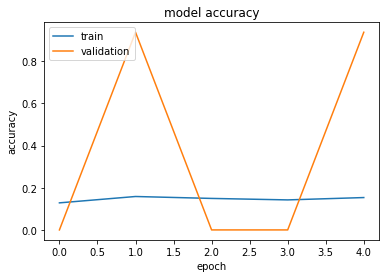

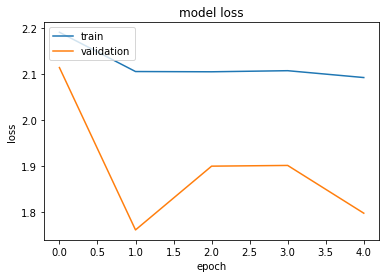

In [63]:
import matplotlib.pyplot as plt
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
model5.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 631s 10s/step - loss: 2.0760 - accuracy: 0.1452


[2.076007843017578, 0.14520813524723053]

In [65]:
score5 = model5.evaluate_generator(validation_generator)
print("Test Score:", score5[0])
print("Test Accuracy:", score5[1])

Test Score: 2.0742440223693848
Test Accuracy: 0.14513787627220154


In [66]:
batch_size = 10
Y_pred6 = model5.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred6 = np.argmax(Y_pred6, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm6 = confusion_matrix(validation_generator.classes, y_pred6)
print(cm6)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred6))

Confusion Matrix
[[300   0   0   0   0   0   0   0   0   0]
 [286   0   0   0   0   0   0   0   0   0]
 [215   0   0   0   0   0   0   0   0   0]
 [253   0   0   0   0   0   0   0   0   0]
 [268   0   0   0   0   0   0   0   0   0]
 [357   0   0   0   0   0   0   0   0   0]
 [300   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [ 44   0   0   0   0   0   0   0   0   0]
 [ 41   0   0   0   0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.15      1.00      0.25       300
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       215
           3       0.00      0.00      0.00       253
           4       0.00      0.00      0.00       268
           5       0.00      0.00      0.00       357
           6       0.00      0.00      0.00       300
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00

In [67]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model5.to_json()
with open('efficientnet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model5.save_weights('model_efficientnet.hdf5', overwrite=True)

# Mobile Net

In [68]:
from tensorflow.keras.applications import MobileNetV2

In [69]:
conv_base6 = MobileNetV2(include_top = False,weights = 'imagenet')

In [70]:
for layer in conv_base6.layers:
    layer.trainable = False
X6 = conv_base6.output
X6 = GlobalAveragePooling2D()(X6)
X6 = Flatten()(X6)
X6 = Dense(units=128, activation='relu')(X6)
X6 = Dropout(0.2)(X6)
X6 = Dense(units=128, activation='relu')(X6)
X6 = Dropout(0.2)(X6)
output6  = Dense(units=10, activation='softmax')(X6)
model6 = Model(conv_base6.input, output6)


model6.summary()


Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
______________________________________________________________________________________

In [71]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model6.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [72]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



 
import datetime
now = datetime.datetime.now
t6 = now()
history6 = model6.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)
print('Training time: %s' % (now() - t6))

Epoch 1/5
45/45 [==============================] - 72s 2s/step - loss: 1.0828 - accuracy: 0.6514 - val_loss: 0.6743 - val_accuracy: 0.7375
Epoch 2/5
45/45 [==============================] - 71s 2s/step - loss: 0.4812 - accuracy: 0.8569 - val_loss: 0.5142 - val_accuracy: 0.8375
Epoch 3/5
45/45 [==============================] - 70s 2s/step - loss: 0.3773 - accuracy: 0.8815 - val_loss: 0.4611 - val_accuracy: 0.8656
Epoch 4/5
45/45 [==============================] - 69s 2s/step - loss: 0.2547 - accuracy: 0.9215 - val_loss: 0.2233 - val_accuracy: 0.9187
Epoch 5/5
45/45 [==============================] - 67s 1s/step - loss: 0.2144 - accuracy: 0.9319 - val_loss: 0.2024 - val_accuracy: 0.9438
Training time: 0:06:04.200932


In [73]:
model6.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 85s 1s/step - loss: 0.1451 - accuracy: 0.9501


[0.14506226778030396, 0.9501451849937439]

In [74]:
score6 = model6.evaluate_generator(validation_generator)
print("Test Score:", score6[0])
print("Test Accuracy:", score6[1])

Test Score: 0.13324837386608124
Test Accuracy: 0.9588776230812073


In [75]:
print(history6.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


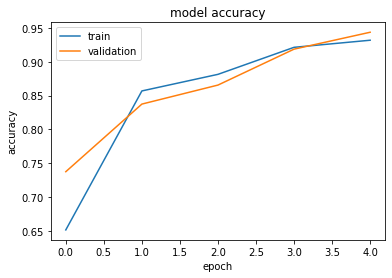

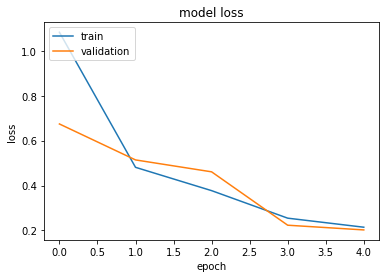

In [76]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [77]:
batch_size = 10
Y_pred7 = model6.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred7 = np.argmax(Y_pred7, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm7 = confusion_matrix(validation_generator.classes, y_pred7)
print(cm7)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred7))

Confusion Matrix
[[282   0   6   0   1   6   3   0   0   2]
 [  0 284   0   0   1   0   1   0   0   0]
 [  0   0 207   0   0   2   6   0   0   0]
 [ 15   0   1 228   0   4   1   0   4   0]
 [  0   1   0   0 267   0   0   0   0   0]
 [  3   0   0   1   1 350   2   0   0   0]
 [  1   3   1   0   4   1 290   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   7   0  37   0]
 [  4   0   0   0   0   0   2   0   0  35]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       300
           1       0.99      0.99      0.99       286
           2       0.96      0.96      0.96       215
           3       1.00      0.90      0.95       253
           4       0.97      1.00      0.99       268
           5       0.96      0.98      0.97       357
           6       0.93      0.97      0.95       300
           7       1.00      0.67      0.80         3
           8       0.90      0.84      0.87

In [78]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model6.to_json()
with open('mobilenet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model6.save_weights('model_mobilenet.hdf5', overwrite=True)

# Alexnet 

In [79]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
import keras.backend as K
K.set_image_data_format('channels_last')

In [80]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(5,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(10,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(15, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(20, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(25, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(40, activation = 'relu', name = "fc0")(X)
    
    X = Dense(40, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(10,activation='softmax',name = 'fc2')(X)
    
    model7 = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model7

In [81]:
alex = AlexNet(train_generator[0][0].shape[1:])

In [82]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 54, 54, 5)         1820      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 54, 54, 5)         20        
_________________________________________________________________
activation_94 (Activation)   (None, 54, 54, 5)         0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 26, 26, 5)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 10)        1260      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 26, 26, 10)        40  

In [83]:
alex.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [84]:
history7 = alex.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 40s 884ms/step - loss: 1.9620 - accuracy: 0.3696 - val_loss: 2.1544 - val_accuracy: 0.4406
Epoch 2/5
45/45 [==============================] - 39s 871ms/step - loss: 1.1728 - accuracy: 0.6234 - val_loss: 1.7551 - val_accuracy: 0.4781
Epoch 3/5
45/45 [==============================] - 41s 910ms/step - loss: 1.0046 - accuracy: 0.6634 - val_loss: 1.5496 - val_accuracy: 0.4187
Epoch 4/5
45/45 [==============================] - 41s 908ms/step - loss: 0.8930 - accuracy: 0.7007 - val_loss: 1.5728 - val_accuracy: 0.2969
Epoch 5/5
45/45 [==============================] - 43s 949ms/step - loss: 0.8472 - accuracy: 0.7153 - val_loss: 1.4535 - val_accuracy: 0.4531


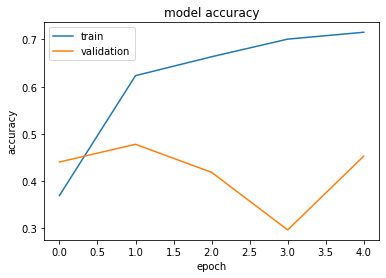

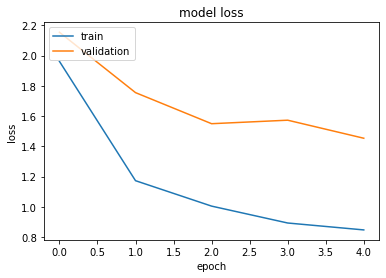

In [85]:
import matplotlib.pyplot as plt
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [86]:
alex.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 50s 777ms/step - loss: 0.9541 - accuracy: 0.7164


[0.954132080078125, 0.7163600921630859]

In [87]:
score7 = alex.evaluate_generator(validation_generator)
print("Test Score:", score7[0])
print("Test Accuracy:", score7[1])

Test Score: 0.938523530960083
Test Accuracy: 0.7276245951652527


In [88]:
batch_size = 10
Y_pred8 = alex.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred8 = np.argmax(Y_pred8, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm8 = confusion_matrix(validation_generator.classes, y_pred8)
print(cm8)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred8))

Confusion Matrix
[[132   0  13  46   1   0 108   0   0   0]
 [  0 265  11   0   1   3   6   0   0   0]
 [ 39   3  69  12  11   1  80   0   0   0]
 [  1   0   0 231  12   4   5   0   0   0]
 [  1   0   2   7 244   6   8   0   0   0]
 [  0   2   0   7   1 342   5   0   0   0]
 [ 22   2  10  15   7  23 221   0   0   0]
 [  1   0   0   1   0   0   1   0   0   0]
 [  9   1   1  27   1   1   4   0   0   0]
 [ 27   0   2   2   0   3   7   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.44      0.50       300
           1       0.97      0.93      0.95       286
           2       0.64      0.32      0.43       215
           3       0.66      0.91      0.77       253
           4       0.88      0.91      0.89       268
           5       0.89      0.96      0.92       357
           6       0.50      0.74      0.59       300
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00

In [89]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = alex.to_json()
with open('alex_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
alex.save_weights('model_alex.hdf5', overwrite=True)

# Google Net

In [90]:
def GoogleNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(5,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(10,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(15, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(20, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(25, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(40, activation = 'relu', name = "fc0")(X)
    
    X = Dense(40, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(10,activation='softmax',name = 'fc2')(X)
    
    model8 = Model(inputs = X_input, outputs = X, name='GoogleNet')
    return model8

In [91]:
google = GoogleNet(train_generator[0][0].shape[1:])

In [92]:
google.summary()

Model: "GoogleNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 54, 54, 5)         1820      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 54, 54, 5)         20        
_________________________________________________________________
activation_99 (Activation)   (None, 54, 54, 5)         0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 26, 26, 5)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 10)        1260      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 26, 26, 10)        40

In [93]:
google.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [94]:
history8 = google.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 40s 897ms/step - loss: 1.6721 - accuracy: 0.4404 - val_loss: 2.1550 - val_accuracy: 0.2313
Epoch 2/5
45/45 [==============================] - 39s 875ms/step - loss: 1.1273 - accuracy: 0.6353 - val_loss: 1.8891 - val_accuracy: 0.1500
Epoch 3/5
45/45 [==============================] - 40s 887ms/step - loss: 1.0091 - accuracy: 0.6557 - val_loss: 1.6904 - val_accuracy: 0.2375
Epoch 4/5
45/45 [==============================] - 41s 922ms/step - loss: 0.9221 - accuracy: 0.6882 - val_loss: 1.5196 - val_accuracy: 0.2875
Epoch 5/5
45/45 [==============================] - 40s 892ms/step - loss: 0.9066 - accuracy: 0.7062 - val_loss: 1.4080 - val_accuracy: 0.3719


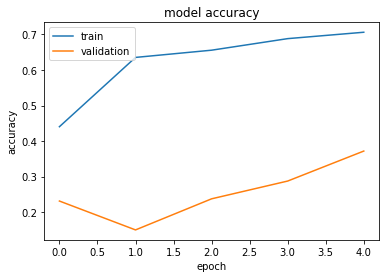

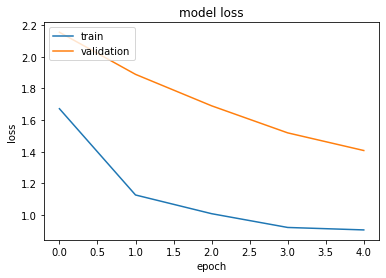

In [95]:
import matplotlib.pyplot as plt
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [96]:
google.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 48s 737ms/step - loss: 0.9874 - accuracy: 0.6980


[0.9874491691589355, 0.6979671120643616]

In [97]:
score8 = google.evaluate_generator(validation_generator)
print("Test Score:", score8[0])
print("Test Accuracy:", score8[1])

Test Score: 0.9694856405258179
Test Accuracy: 0.6985970139503479


In [98]:
batch_size = 10
Y_pred9 = google.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred9 = np.argmax(Y_pred9, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm9 = confusion_matrix(validation_generator.classes, y_pred9)
print(cm9)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred9))

Confusion Matrix
[[106   0   9  58   0   3 124   0   0   0]
 [  4 267   3   0   0   5   7   0   0   0]
 [ 62   3  50  23   9   8  60   0   0   0]
 [  1   0   0 240   8   3   1   0   0   0]
 [  4   0   8  22 220  10   4   0   0   0]
 [  1   1   1   9   0 343   2   0   0   0]
 [ 31   2   3  23   1  22 218   0   0   0]
 [  1   1   0   1   0   0   0   0   0   0]
 [  4   0   1  36   3   0   0   0   0   0]
 [ 23   0   2   3   0   2  11   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.35      0.39       300
           1       0.97      0.93      0.95       286
           2       0.65      0.23      0.34       215
           3       0.58      0.95      0.72       253
           4       0.91      0.82      0.86       268
           5       0.87      0.96      0.91       357
           6       0.51      0.73      0.60       300
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00

In [99]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = google.to_json()
with open('googlenet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
google.save_weights('model_googlenet.hdf5', overwrite=True)

# Caffe Net

In [100]:
def CaffeNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(5,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(10,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(15, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(20, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(25, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(40, activation = 'relu', name = "fc0")(X)
    
    X = Dense(40, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(10,activation='softmax',name = 'fc2')(X)
    
    model9 = Model(inputs = X_input, outputs = X, name='CaffeNet')
    return model9

In [101]:
caffe = CaffeNet(train_generator[0][0].shape[1:])

In [102]:
caffe.summary()

Model: "CaffeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 54, 54, 5)         1820      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 54, 54, 5)         20        
_________________________________________________________________
activation_104 (Activation)  (None, 54, 54, 5)         0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 26, 26, 5)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 10)        1260      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 26, 26, 10)        40 

In [103]:
caffe.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [104]:
history9 = caffe.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 42s 932ms/step - loss: 1.6351 - accuracy: 0.4390 - val_loss: 2.0523 - val_accuracy: 0.8500
Epoch 2/5
45/45 [==============================] - 40s 898ms/step - loss: 1.0801 - accuracy: 0.6823 - val_loss: 1.7645 - val_accuracy: 0.5281
Epoch 3/5
45/45 [==============================] - 40s 892ms/step - loss: 0.9470 - accuracy: 0.6964 - val_loss: 1.5876 - val_accuracy: 0.4750
Epoch 4/5
45/45 [==============================] - 40s 884ms/step - loss: 0.8980 - accuracy: 0.7104 - val_loss: 1.1665 - val_accuracy: 0.6438
Epoch 5/5
45/45 [==============================] - 41s 905ms/step - loss: 0.8007 - accuracy: 0.7356 - val_loss: 1.2826 - val_accuracy: 0.3938


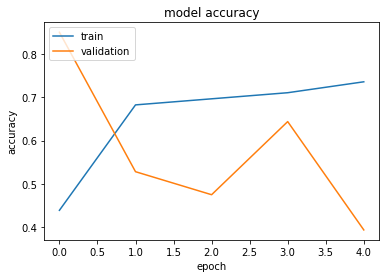

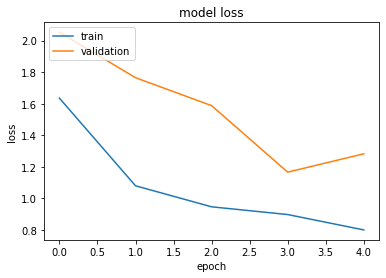

In [105]:
import matplotlib.pyplot as plt
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [106]:
caffe.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 49s 761ms/step - loss: 1.0155 - accuracy: 0.6626


[1.0154533386230469, 0.6626331210136414]

In [107]:
score9 = caffe.evaluate_generator(validation_generator)
print("Test Score:", score9[0])
print("Test Accuracy:", score9[1])

Test Score: 0.9934055805206299
Test Accuracy: 0.6792452931404114


In [108]:
batch_size = 10
Y_pred10 = caffe.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred10 = np.argmax(Y_pred10, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm10 = confusion_matrix(validation_generator.classes, y_pred10)
print(cm10)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred10))

Confusion Matrix
[[109   2  27  12   0   0 150   0   0   0]
 [  0 276   3   0   1   2   4   0   0   0]
 [ 39   8  63   0   4   0 101   0   0   0]
 [ 50   0   1 121  21   1  59   0   0   0]
 [  0   1   7   1 240   2  17   0   0   0]
 [  4   2   2   3   5 331  10   0   0   0]
 [  6   5  10   0   0  15 264   0   0   0]
 [  0   0   1   0   0   0   2   0   0   0]
 [ 15   1   2   6   3   0  17   0   0   0]
 [ 17   0   4   0   0   0  20   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.36      0.40       300
           1       0.94      0.97      0.95       286
           2       0.53      0.29      0.38       215
           3       0.85      0.48      0.61       253
           4       0.88      0.90      0.89       268
           5       0.94      0.93      0.94       357
           6       0.41      0.88      0.56       300
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00

In [109]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = caffe.to_json()
with open('caffenet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
google.save_weights('model_caffenet.hdf5', overwrite=True)

# Dense Net

In [110]:
from keras.applications import DenseNet121
from keras.models import load_model,model_from_json

In [111]:
conv_base10 = DenseNet121(include_top = False,weights = 'imagenet')

In [112]:
for layer in conv_base10.layers:
    layer.trainable = False
X10 = conv_base10.output
X10 = GlobalAveragePooling2D()(X10)
X10 = Flatten()(X10)
X10 = Dense(units=128, activation='relu')(X10)
X10 = Dropout(0.2)(X10)
X10 = Dense(units=128, activation='relu')(X10)
X10 = Dropout(0.2)(X10)
output10  = Dense(units=10, activation='softmax')(X10)
model10 = Model(conv_base10.input, output10)


model10.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________________________________________________________________________

In [113]:
model10.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [114]:
history10 = model10.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 166s 4s/step - loss: 1.3068 - accuracy: 0.5722 - val_loss: 0.6369 - val_accuracy: 0.7688
Epoch 2/5
45/45 [==============================] - 164s 4s/step - loss: 0.5911 - accuracy: 0.8282 - val_loss: 0.3051 - val_accuracy: 0.8781
Epoch 3/5
45/45 [==============================] - 176s 4s/step - loss: 0.3905 - accuracy: 0.8604 - val_loss: 0.2248 - val_accuracy: 0.9094
Epoch 4/5
45/45 [==============================] - 177s 4s/step - loss: 0.3128 - accuracy: 0.8958 - val_loss: 0.3361 - val_accuracy: 0.8750
Epoch 5/5
45/45 [==============================] - 171s 4s/step - loss: 0.2747 - accuracy: 0.8990 - val_loss: 0.2203 - val_accuracy: 0.9156


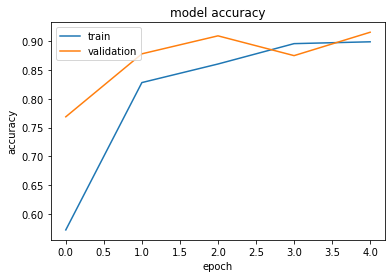

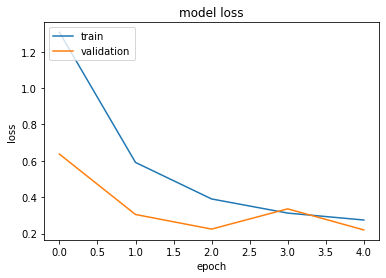

In [115]:
import matplotlib.pyplot as plt
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [116]:
model10.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 196s 3s/step - loss: 0.1560 - accuracy: 0.9463


[0.1560392528772354, 0.9462729692459106]

In [117]:
score10 = model10.evaluate_generator(validation_generator)
print("Test Score:", score10[0])
print("Test Accuracy:", score10[1])

Test Score: 0.13949838280677795
Test Accuracy: 0.9535558819770813


In [118]:
batch_size = 10
Y_pred11 = model10.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred11 = np.argmax(Y_pred11, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm11 = confusion_matrix(validation_generator.classes, y_pred11)
print(cm11)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred11))

Confusion Matrix
[[273   0   1  21   0   1   4   0   0   0]
 [  0 285   0   0   0   0   1   0   0   0]
 [  1   1 206   0   0   0   7   0   0   0]
 [  6   0   0 241   0   6   0   0   0   0]
 [  0   2   0   0 265   0   1   0   0   0]
 [  0   0   0   1   0 355   1   0   0   0]
 [  0   2   1   1   3   1 292   0   0   0]
 [  0   0   0   0   0   0   1   2   0   0]
 [  0   0   1   9   0   0   9   0  25   0]
 [  9   0   0   2   1   0   2   0   0  27]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       300
           1       0.98      1.00      0.99       286
           2       0.99      0.96      0.97       215
           3       0.88      0.95      0.91       253
           4       0.99      0.99      0.99       268
           5       0.98      0.99      0.99       357
           6       0.92      0.97      0.94       300
           7       1.00      0.67      0.80         3
           8       1.00      0.57      0.72

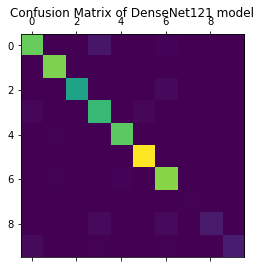

In [119]:
import pylab as pl
pl.matshow(cm11)
pl.title("Confusion Matrix of DenseNet121 model")
pl.show()

In [120]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model10.to_json()
with open('densenet121_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model10.save_weights('model_densenet121.hdf5', overwrite=True)

# Xception 

In [121]:
from keras.applications import Xception
from keras.models import load_model,model_from_json

In [122]:
conv_base11 = Xception(include_top = False,weights = 'imagenet')

In [123]:
for layer in conv_base11.layers:
    layer.trainable = False  
    
X11 = conv_base11.output
X11 = keras.layers.GlobalAveragePooling2D()(X11)
X11 = keras.layers.Dense(128,activation = 'relu')(X11)
output_11 = keras.layers.Dense(10,activation = 'softmax')(X11)
model11 = keras.Model(inputs = conv_base11.input,outputs = output_11)

In [124]:
model11.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [125]:
model11.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [126]:
history11 = model11.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 187s 4s/step - loss: 1.0357 - accuracy: 0.6816 - val_loss: 0.3980 - val_accuracy: 0.8875
Epoch 2/5
45/45 [==============================] - 187s 4s/step - loss: 0.4508 - accuracy: 0.8443 - val_loss: 0.4261 - val_accuracy: 0.8562
Epoch 3/5
45/45 [==============================] - 175s 4s/step - loss: 0.3322 - accuracy: 0.8955 - val_loss: 0.3045 - val_accuracy: 0.9094
Epoch 4/5
45/45 [==============================] - 193s 4s/step - loss: 0.2989 - accuracy: 0.9011 - val_loss: 0.4039 - val_accuracy: 0.8500
Epoch 5/5
45/45 [==============================] - 179s 4s/step - loss: 0.2297 - accuracy: 0.9285 - val_loss: 0.2721 - val_accuracy: 0.9125


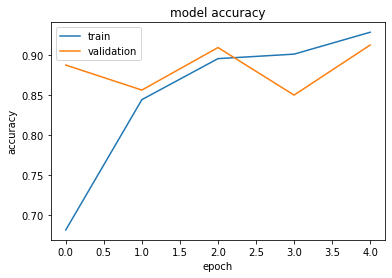

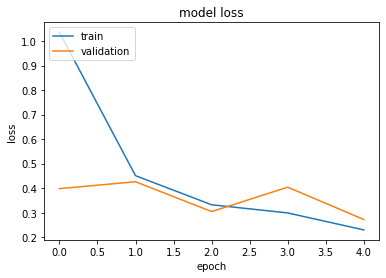

In [127]:
import matplotlib.pyplot as plt
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [128]:
model11.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 225s 3s/step - loss: 0.2031 - accuracy: 0.9347


[0.20308203995227814, 0.9346563220024109]

In [129]:
score11 = model11.evaluate_generator(validation_generator)
print("Test Score:", score11[0])
print("Test Accuracy:", score11[1])

Test Score: 0.18215246498584747
Test Accuracy: 0.9404934644699097


In [130]:
batch_size = 10
Y_pred12 = model11.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred12 = np.argmax(Y_pred12, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm12 = confusion_matrix(validation_generator.classes, y_pred12)
print(cm12)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred12))

Confusion Matrix
[[272   0   2  15   0   7   4   0   0   0]
 [  0 283   0   0   0   0   3   0   0   0]
 [  1   2 208   1   0   0   3   0   0   0]
 [ 18   0   0 219   0  16   0   0   0   0]
 [  0   3   0   0 263   0   2   0   0   0]
 [  1   1   1   5   0 349   0   0   0   0]
 [  1   0   2   1   1   5 290   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0]
 [  0   0   5   6   0   3   1   0  29   0]
 [  7   0   0   0   0   5   1   0   0  28]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       300
           1       0.98      0.99      0.98       286
           2       0.95      0.97      0.96       215
           3       0.89      0.87      0.88       253
           4       1.00      0.98      0.99       268
           5       0.91      0.98      0.94       357
           6       0.95      0.97      0.96       300
           7       1.00      1.00      1.00         3
           8       1.00      0.66      0.79

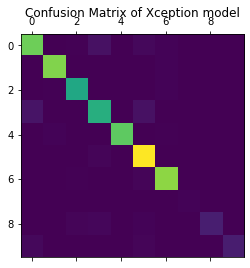

In [131]:
import pylab as pl
pl.matshow(cm12)
pl.title("Confusion Matrix of Xception model")
pl.show()

In [132]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model11.to_json()
with open('xception_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model11.save_weights('model_xception.hdf5', overwrite=True)

# NAS Net Mobile

In [133]:
from keras.applications import NASNetMobile
from keras.models import load_model,model_from_json

In [134]:
conv_base12 = NASNetMobile(include_top = False,weights = 'imagenet')

In [135]:
for layer in conv_base12.layers:
    layer.trainable = False  
    
X12 = conv_base12.output
X12 = keras.layers.GlobalAveragePooling2D()(X12)
X12 = keras.layers.Dense(128,activation = 'relu')(X12)
output_12 = keras.layers.Dense(10,activation = 'softmax')(X12)
model12 = keras.Model(inputs = conv_base12.input,outputs = output_12)

In [136]:
model12.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_13[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_109 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
______________________________________________________________________________________

In [137]:
model12.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [138]:
history12 = model12.fit_generator(train_generator,steps_per_epoch = 45,epochs = 5,verbose = 1, validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
45/45 [==============================] - 111s 2s/step - loss: 1.0367 - accuracy: 0.6935 - val_loss: 0.5227 - val_accuracy: 0.8469
Epoch 2/5
45/45 [==============================] - 104s 2s/step - loss: 0.5036 - accuracy: 0.8326 - val_loss: 0.6998 - val_accuracy: 0.7469
Epoch 3/5
45/45 [==============================] - 106s 2s/step - loss: 0.3474 - accuracy: 0.8917 - val_loss: 0.3067 - val_accuracy: 0.9031
Epoch 4/5
45/45 [==============================] - 106s 2s/step - loss: 0.2911 - accuracy: 0.9069 - val_loss: 0.4947 - val_accuracy: 0.8375
Epoch 5/5
45/45 [==============================] - 105s 2s/step - loss: 0.2562 - accuracy: 0.9158 - val_loss: 0.3233 - val_accuracy: 0.8938


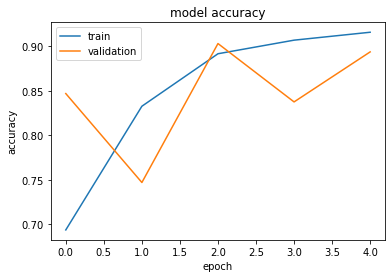

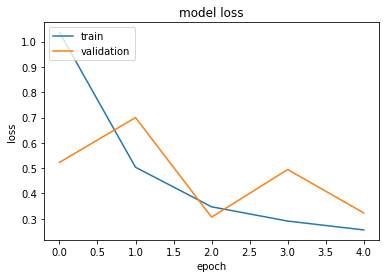

In [139]:
import matplotlib.pyplot as plt
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [140]:
model12.evaluate_generator(train_generator,steps = len(validation_generator),verbose = 1)

65/65 [==============================] - 128s 2s/step - loss: 0.2306 - accuracy: 0.9163


[0.23062661290168762, 0.9162632822990417]

In [141]:
score12 = model12.evaluate_generator(validation_generator)
print("Test Score:", score12[0])
print("Test Accuracy:", score12[1])

Test Score: 0.25379863381385803
Test Accuracy: 0.9095306992530823


In [142]:
batch_size = 10
Y_pred13 = model12.predict_generator(validation_generator, 1400 // batch_size+1)
y_pred13 = np.argmax(Y_pred13, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm13 = confusion_matrix(validation_generator.classes, y_pred13)
print(cm13)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred13))

Confusion Matrix
[[267   0   1   9   0  10   8   0   0   5]
 [  0 261   0   0   1   0  24   0   0   0]
 [  1   0 201   1   0   1  10   0   1   0]
 [ 22   0   0 203   0   8  12   0   7   1]
 [  0   1   0   0 241   0  26   0   0   0]
 [  1   0   0  14   0 338   4   0   0   0]
 [  0   0   0   0   0   3 296   0   1   0]
 [  0   0   0   0   0   0   0   2   0   1]
 [  0   0   1   1   0   0   1   0  41   0]
 [  6   0   0   1   0   2   2   0   0  30]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       300
           1       1.00      0.91      0.95       286
           2       0.99      0.93      0.96       215
           3       0.89      0.80      0.84       253
           4       1.00      0.90      0.95       268
           5       0.93      0.95      0.94       357
           6       0.77      0.99      0.87       300
           7       1.00      0.67      0.80         3
           8       0.82      0.93      0.87

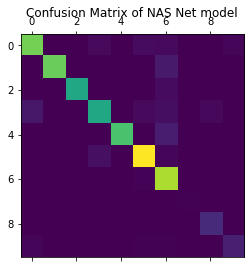

In [143]:
import pylab as pl
pl.matshow(cm13)
pl.title("Confusion Matrix of NAS Net model")
pl.show()

In [144]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = model12.to_json()
with open('nasnet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
model12.save_weights('model_nasnet.hdf5', overwrite=True)

In [145]:
train_generator.class_indices

{'Cloudy': 0,
 'Night': 1,
 'Rain': 2,
 'Shine': 3,
 'Sunny': 4,
 'Sunrise': 5,
 'foggy': 6,
 'foudre': 7,
 'neige': 8,
 'tornado': 9}